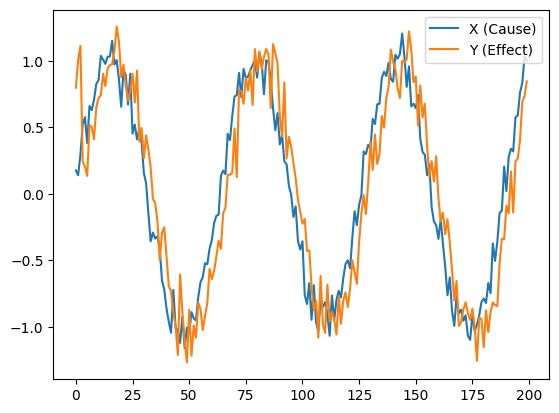

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(0)

time = np.arange(0, 200)
x = np.sin(time / 10) + np.random.normal(0, 0.1, len(time))
y = np.roll(x, 3) + np.random.normal(0, 0.1, len(time))

df = pd.DataFrame({"time": time, "x": x, "y": y})
plt.plot(df["time"], df["x"], label="X (Cause)")
plt.plot(df["time"], df["y"], label="Y (Effect)")
plt.legend()
plt.show()


In [2]:
from statsmodels.tsa.stattools import grangercausalitytests

result = grangercausalitytests(df[["y", "x"]], maxlag=5, verbose=False)
p_values = [round(result[i+1][0]['ssr_chi2test'][1], 4) for i in range(5)]
print("P-values for lags 1–5:", p_values)


P-values for lags 1–5: [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [3]:
min_p = min(p_values)
if min_p < 0.05:
    print("There is evidence of dynamic causality.")
else:
    print("No significant causality detected.")


There is evidence of dynamic causality.
